# 4-1 타이타닉의 생존자 가려내기

## 탐색: 타이타닉의 데이터 살펴보기

### [타이타닉 데이터셋의 기본 정보 구하기]

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

df_train = pd.read_csv("/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/titanic_train.csv")
df_test = pd.read_csv("/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/titanic_test.csv")
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [2]:
print(df_train.info())
print("-------------------------")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     

### [불필요한 피처 제거하기]

In [3]:
# 데이터셋에서 name, ticket, body, cabin, home.dest 피처를 제거
df_train = df_train.drop(["name", "ticket", "body", "cabin", "home.dest"], axis = 1)
df_test = df_test.drop(["name", "ticket", "body", "cabin", "home.dest"], axis = 1)

### [탐색적 데이터 분석하기]

0    563
1    353
Name: survived, dtype: int64


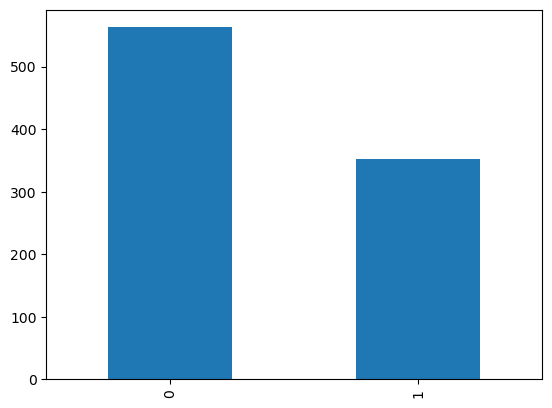

In [4]:
print(df_train["survived"].value_counts())
survived_data = df_train["survived"].value_counts()
survived_data.plot.bar()
plt.show()

3    498
1    230
2    188
Name: pclass, dtype: int64


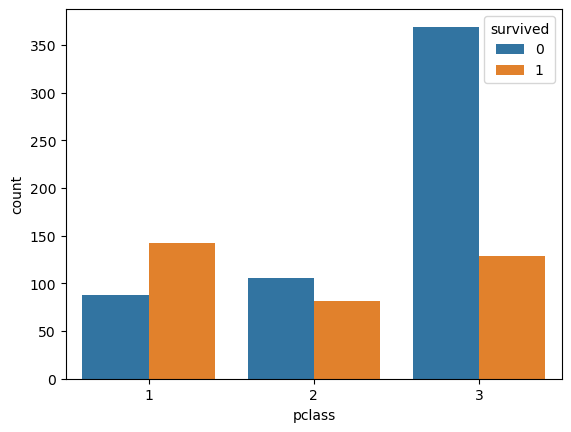

In [5]:
# survived 피처를 기준으로 그룹을 나누어 그룹별 pclass 피처의 분포를 살펴봄
print(df_train["pclass"].value_counts())
ax = sns.countplot(x = "pclass", hue = "survived", data = df_train)
plt.show()


### [변수 탐색작업 자동화하기]

data std is 14.22
data std is 13.71
The t-statistic and p-value assuming equal variances is -0.546 and 0.585
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587
The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in Non-Survived 0.968 and 0.000


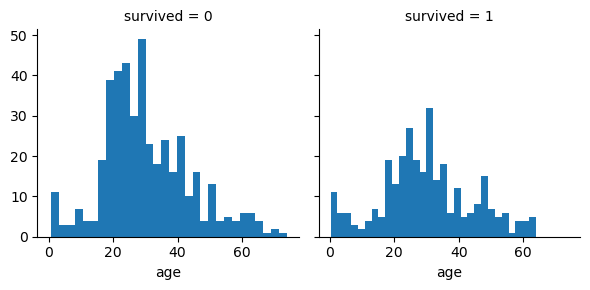

In [6]:
from scipy import stats

# 두 집단의 피처를 비교해주며 탐색 작업을 자동화하는 함수를 정의
def valid_features(df, col_name, distribution_check = True):
    # 두 집단 (survived = 1, survived = 0)의 분포 그래프를 출력
    g = sns.FacetGrid(df, col = "survived")
    g.map(plt.hist, col_name, bins = 30)

    # 두 집단의 표준편차를 각각 출력
    titanic_survived = df[df["survived"] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is %.2f" % np.std(titanic_survived_static))
    titanic_n_survived = df[df["survived"] == 0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is %.2f" % np.std(titanic_n_survived_static))

    # T-test로 두 집단의 평균 차이를 검정
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var = False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f" % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

    if distribution_check == True:
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" % stats.shapiro(titanic_n_survived[col_name]))

# 앞서 정의한 valid_features 함수를 실행, agd 피처와 sibsp 피처를 탐색
valid_features(df_train[df_train["age"] > 0], "age", distribution_check = True)

data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015


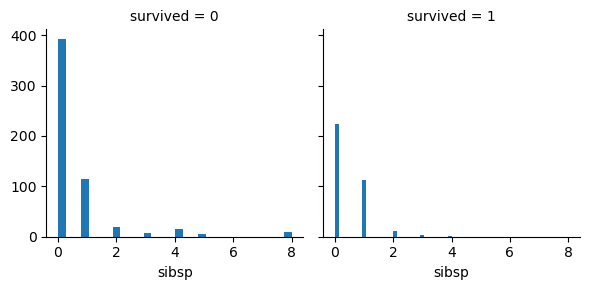

In [7]:
valid_features(df_train, "sibsp", distribution_check = False)

#### 미니퀴즈

[parch, fare, sex, embarked 피처에 대해 생존자/비생존자 간의 차이를 탐색하기]

data std is 0.74
data std is 0.89
The t-statistic and p-value assuming equal variances is 1.865 and 0.063
The t-statistic and p-value not assuming equal variances is 1.942 and 0.052


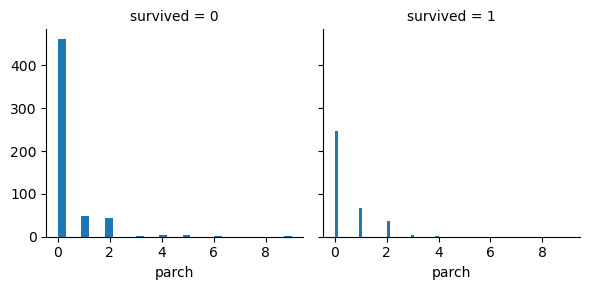

In [8]:
valid_features(df_train, "parch", distribution_check = False)

data std is 60.68
data std is 33.65
The t-statistic and p-value assuming equal variances is 7.523 and 0.000
The t-statistic and p-value not assuming equal variances is 6.657 and 0.000
The w-statistic and p-value in Survived 0.660 and 0.000
The w-statistic and p-value in Non-Survived 0.520 and 0.000


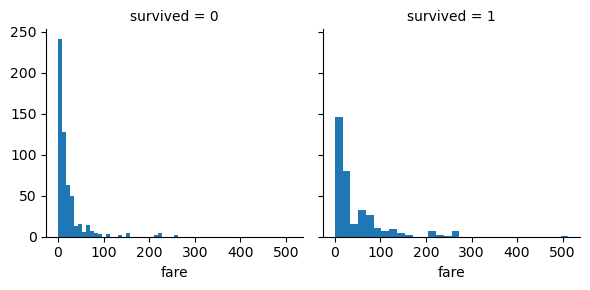

In [9]:
valid_features(df_train, "fare", distribution_check = True)

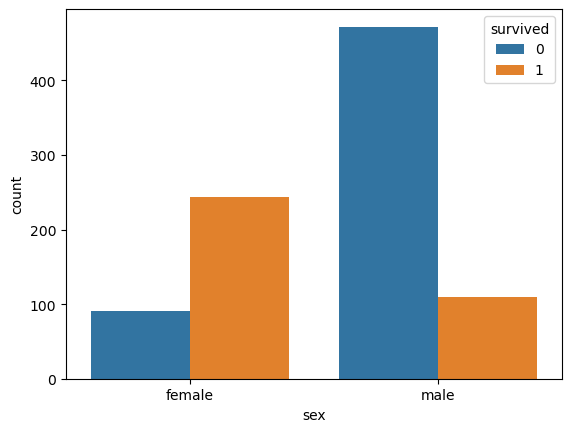

In [10]:
ax = sns.countplot(x = "sex", hue = "survived", data = df_train)

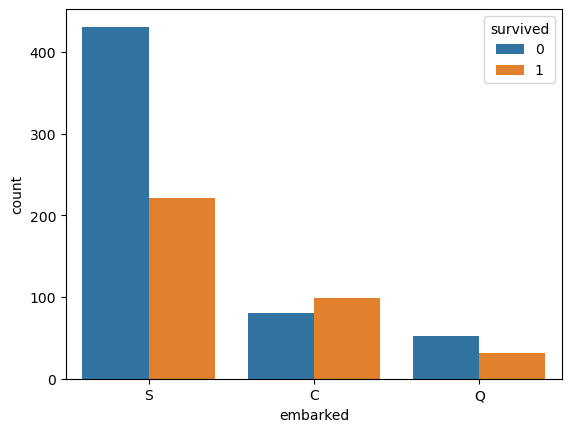

In [11]:
ax = sns.countplot(x = "embarked", hue = "survived", data = df_train)

## 분류: 생존자 분류 모델 만들기

### [분류 모델을 위해 전처리하기]

In [12]:
# age의 결측값을 평균값으로 대체
replace_mean = df_train[df_train["age"] > 0]["age"].mean()
df_train["age"] = df_train["age"].fillna(replace_mean)
df_test["age"] = df_test["age"].fillna(replace_mean)

# embark : 2개의 결측값을 최빈값으로 대체
embarked_mode = df_train["embarked"].mode()
df_train["embarked"] = df_train["embarked"].fillna(embarked_mode)
df_test["embarked"] = df_test["embarked"].fillna(embarked_mode)

# one-hot encoding을 위한 통합 데이터 프레임(whole_df)을 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

# pandas 패키지를 이용한 one-hot 인코딩을 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_4266/3433159433.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_df = df_train.append(df_test)


,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
911,3,1,0.170000,1,2,20.5750,1,0,0,0,1
912,3,0,30.231444,0,0,8.0500,0,1,0,0,1
913,3,1,30.231444,0,0,7.7333,1,0,0,1,0
914,2,1,20.000000,0,0,36.7500,1,0,0,0,1


In [13]:
# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리
x_train, y_train = df_train.loc[:, df_train.columns != "survived"].values, df_train["survived"].values
x_test, y_test = df_test.loc[:, df_test.columns != "survived"].values, df_train["survived"].values
x_train

array([[ 2.        , 13.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        ,  4.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.        , 30.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        , 30.23144399,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 2.        , 20.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 32.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

### [분류 모델링: 로지스틱 회귀 모델]

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리
x_train, y_train = df_train.loc[:, df_train.columns != "survived"].values, df_train["survived"].values # 학습할 데이터
x_test, y_test = df_test.loc[:, df_test.columns != "survived"].values, df_test["survived"].values # y_test = 실제 데이터

# 로지스틱 회귀 모델을 학습
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# 학습한 모델의 테스트 데이터셋에 대한 예측 결과를 반환
y_pred = lr.predict(x_test) # 학습한 모델을 통해 예측한 데이터
y_pred_probability = lr.predict_proba(x_test)[:, 1]

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### [분류 모델 평가하기]

In [15]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 재현도, f1 평가 지표를 각각 출력
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

Accuracy: 0.80
Precision: 0.756
Recall: 0.673
F1: 0.712


In [16]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix를 출력
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
confmat

array([[214,  32],
       [ 48,  99]])

### [로지스틱 회귀 모델의 AUC 구하기]

AUC: 0.837


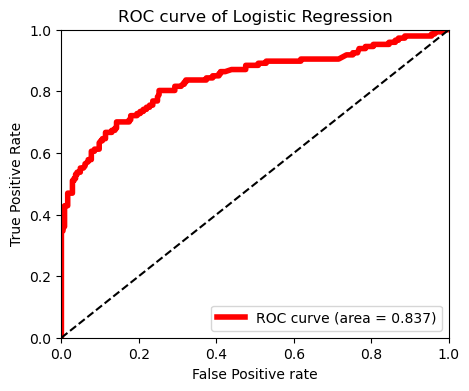

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# AUC(Area Under the Curve)를 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC: %.3f" % roc_auc)

# ROC curve를 그래프로 출력
plt.rcParams["figure.figsize"] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label = "ROC curve (area = %.3f)" % roc_auc, color = "red", linewidth = 4.0)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve of Logistic Regression")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "lower right")
plt.show()

### [의사결정 나무]

Accuracy: 0.76
Precision: 0.686
Recall: 0.639
F1: 0.662
AUC: 0.740


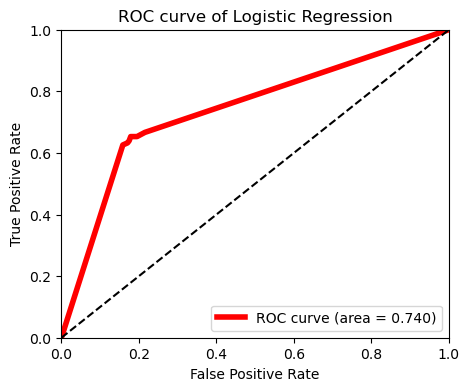

In [18]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:, 1]

# 학습한 모델의 성능을 계산하여 출력
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

# 학습한 모델의 AUC를 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC: %.3f" % roc_auc)

# ROC curve를 그래프로 출력
plt.rcParams["figure.figsize"] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label = "ROC curve (area = %.3f)" % roc_auc, color = "red", linewidth = 4.0)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC curve of Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "lower right")
plt.show()

## 모델 개선: 피처 엔지니어링 첫걸음

### [분류 모델을 위해 전처리하기]

In [19]:
# 데이터를 다시 불러옴
df_test = pd.read_csv("/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/titanic_test.csv")
df_train = pd.read_csv("/Users/yanghaejun/Documents/이것이 데이터분석이다/이것이 데이터 분석이다 예제/data/titanic_train.csv")
df_test = df_test.drop(["ticket", "body", "home.dest"], axis = 1)
df_train = df_train.drop(["ticket", "body", "home.dest"], axis = 1)

# age의 결측값을 평균값으로 대체
replace_mean = df_train[df_train["age"] > 0]["age"].mean()
df_train["age"] = df_train["age"].fillna(replace_mean)
df_test["age"] = df_test["age"].fillna(replace_mean)

# embark: 2개의 결측값을 최빈값으로 대체
embarked_mode = df_train["embarked"].mode()
df_train["embarked"] = df_train["embarked"].fillna(embarked_mode)
df_test["embarked"] = df_test["embarked"].fillna(embarked_mode)

# one-hot encoding을 위한 통합 데이터 프레임(whole_df)을 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

/var/folders/79/v97_0rqs3p34z9xx6y57xks80000gn/T/ipykernel_4266/70512326.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_df = df_train.append(df_test)


### [cabin 피처 활용하기]

In [20]:
whole_df["cabin"].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
B96 B98            4
                  ..
C91                1
D40                1
B3                 1
E45                1
F38                1
Name: cabin, Length: 186, dtype: int64

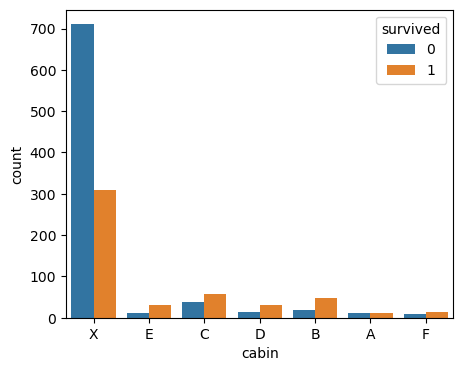

In [21]:
# 결측 데이터의 경우는 "X"로 대체
whole_df["cabin"] = whole_df["cabin"].fillna("X")

# cabin 피처의 첫 번째 문자를 추출
whole_df["cabin"] = whole_df["cabin"].apply(lambda x: x[0])

# 추출한 문자 중, G와 T는 수가 너무 적기 때문에, 마찬가지로 "X"로 대체
whole_df["cabin"] = whole_df["cabin"].replace({"G": "X", "T": "X"})

ax = sns.countplot(x = "cabin", hue = "survived", data = whole_df)
plt.show()

### [name 피처 활용하기]

In [22]:
whole_df["name"]

0                 Mellinger, Miss. Madeleine Violet
1                                 Wells, Miss. Joan
2                    Duran y More, Miss. Florentina
3                                Scanlan, Mr. James
4                      Bradley, Miss. Bridget Delia
                           ...                     
388               Karlsson, Mr. Julius Konrad Eugen
389    Ware, Mrs. John James (Florence Louise Long)
390                            O'Keefe, Mr. Patrick
391                                Tobin, Mr. Roger
392                            Daniels, Miss. Sarah
Name: name, Length: 1309, dtype: object

In [23]:
# 이름에서 호칭을 추출
name_grade = whole_df["name"].apply(lambda x: x.split(", ")[1].split(". ")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)

['Miss', 'Mr', 'Master', 'Mrs', 'Dr', 'Mlle', 'Col', 'Rev', 'Ms', 'Mme', 'Sir', 'the Countess', 'Dona', 'Jonkheer', 'Lady', 'Major', 'Don', 'Capt']


In [24]:
# 호칭에 따라 사회적 지위(1910년대 기준)를 정의
grade_dict = {"A": ["Rev", "Col", "Major", "Dr", "Capt", "Sir"],
            "B": ["Ms", "Mme", "Mrs", "Dona"],
            "C": ["Jonkheer", "the Countess"],
            "D": ["Mr", "Don"],
            "E": ["Master"],
            "F": ["Miss", "Mlle", "Lady"]}

# 정의한 호칭의 기준에 따라 A~F의 문자로 name 피처를 다시 정의하는 함수
def give_grade(x):
    grade = x.split(", ")[1].split(". ")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return "G"

# 위의 함수를 적용하여 name 피처를 새롭게 정의
whole_df["name"] = whole_df["name"].apply(lambda x: give_grade(x))
print(whole_df["name"].value_counts())

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64


#### 미니퀴즈

[cabin 피처와 마찬가지로, name 피처에 대해 (생존자/비생존) 그룹 간의 차이를 탐색해보기]

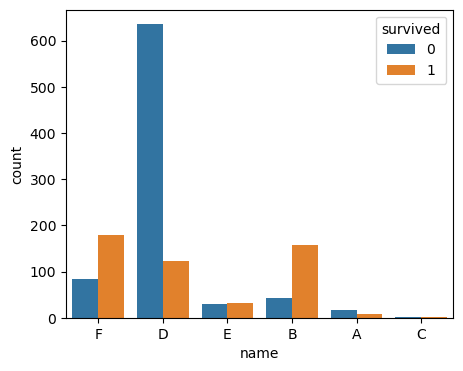

In [25]:
sns.countplot(x = "name", hue = "survived", data = whole_df)
plt.show()

In [26]:
from scipy import stats
chis = stats.chisquare(f_obs = whole_df.groupby("cabin")["survived"].count())
print("statistic = %.3f, pvalue = %.3f" % chis)

statistic = 4349.733, pvalue = 0.000


### [원-핫 인코딩]

In [27]:
# 판다스 패키지를 이용한 원-핫 인코딩을 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]
df_train.head(5)

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### [피처 엔지니어링이 완료된 데이터셋 학습]

Accuracy: 0.80
Precision: 0.739
Recall: 0.714
F1: 0.727
AUC: 0.853


/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


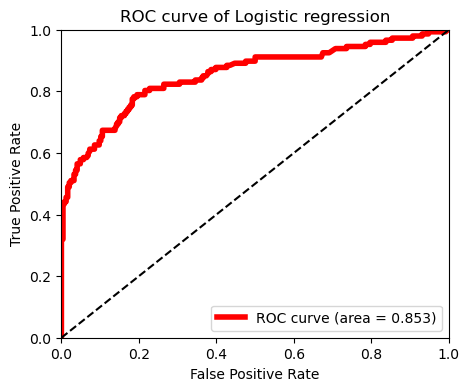

In [28]:
# 데이터를 학습 데이터셋, 테스트 데이터셋으로 분리
x_train, y_train = df_train.loc[:, df_train.columns != "survived"].values, df_train["survived"].values
x_test, y_test = df_test.loc[:, df_test.columns != "survived"].values, df_test["survived"].values

# 로지스틱 회귀모델을 학습
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# 학습한 모델의 테스트  데이터셋에 대한 예측 결과를 반환
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:, 1]

# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

# AUC (Area Under the Curve)를 계산하여 출력
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC: %.3f" % roc_auc)

# ROC curve 그래프를 출력
plt.rcParams["figure.figsize"] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label = "ROC curve (area = %.3f)" % roc_auc, color = "red", linewidth = 4.0)
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve of Logistic regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = "lower right")
plt.show()

### [피처 영향력 살펴보기]

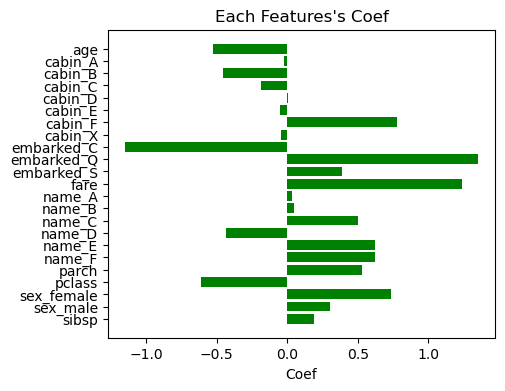

In [29]:
# 예측 대상인 survived 피처를 제외한 모든 피처를 리스트로 반환 (그래프의 y축)
cols = df_train.columns.difference(["survived"]).tolist()
y_pos = np.arange(len(cols))

# 각 피처별 회귀 분석 계수를 그래프의 x축으로 하여, 피처 영향력 그래프를 출력
plt.rcParams["figure.figsize"] = [5, 4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], color = "green", ecolor = "black", align = "center")
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_title("Each Features's Coef")
ax.set_xlabel("Coef")
plt.show()

## 평가: 모델 검증하기

### [K-fold 교차 검증 수행하기]

In [30]:
from sklearn.model_selection import KFold

# K-fold 교차 검증의 k를 5로 설정
k = 5
cv = KFold(k, shuffle = True, random_state = 0)
auc_history = []

# K-fold를 5번 분할 학습으로 반복
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    # 5개로 분할된 fold 중 4개를 학습 데이터셋, 1개를 테스트 데이터셋으로 지정함. 매 반복시마다, 테스트 데이터셋은 변경됨.
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]

    # survived 피처를 y, 나머지 피처들을 x 데이터로 지정
    splited_x_train, splited_y_train = df_train.loc[:, df_train.columns != "survived"].values, df_train["survived"].values
    splited_x_test, splited_y_test = df_test.loc[:, df_test.columns != "survived"].values, df_test["survived"].values

    # 주어진 데이터로 로지스틱 회귀모델을 학습
    lr = LogisticRegression(random_state = 0)
    lr.fit(splited_x_train, splited_y_train)
    y_pred = lr.predict(splited_x_test)
    y_pred_probability = lr.predict_proba(splited_x_test)[:, 1]

    # 테스트 데이터셋의 AUC를 계산하여 auc_history에 저장
    false_positive_rate, true_positive_rate, thresholds = roc_curve(splited_y_test, y_pred_probability)
    roc_auc = roc_auc_score(splited_y_test, y_pred_probability)
    auc_history.append(roc_auc)

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

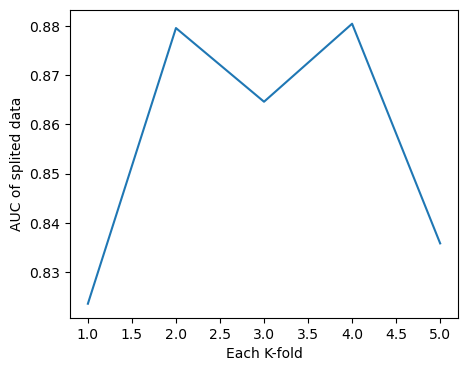

In [31]:
# auc_history에 저장된 다섯 번의 학습 결과(AUC)를 그래프로 출력
plt.xlabel("Each K-fold")
plt.ylabel("AUC of splited data")
plt.plot(range(1, k + 1), auc_history)
plt.show()

/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yanghaejun/opt/anaconda3/envs/yang_conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

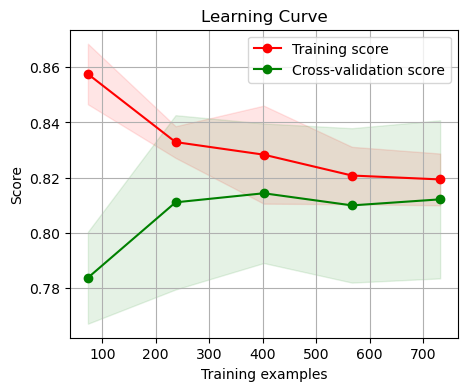

In [32]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, x_train, y_train)
plt.show()